# Proyecto Final (Algebra lineal y Ecuaciones diferenciales)
Autores:
- Juliana Estrada
- Antonia Ramón Jaramillo
- Juan Esteban López Pareja
## Contexto
Este archivo contiene todo el codigo utilizado para realizar el proyecto final de la clase de *Algebra lineal y Ecuaciones Diferenciales* en forma de un archivo *.ipynb*, es decir un Jupyter Notebook.
El codigo corre en Python --verision-- ***

Este archivo *SOLO* contiene el codigo y explicaciones necesarias para entenderlo e implementarlo y no constituye la entrega final, ésta se encuentra en {hipervinculo} o en el archivo subido a E-aulas.

# SymPy
Esta sección se centra en la solucion del sistema de ecuaciones diferenciales de forma simbolica y analitica mediante la libreria *Sympy*.

In [ ]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import sympy as sp


t = sp.symbols('t')

A1 = sp.Function('A')
N1 = sp.Function('N')

ra = float(0.5)
ka = float(20)
kn = float(10)
ma = float(0.8)
mn = float(0.8)   

eq1 = Eq(ra*A1(t)*(1 - A1(t)/ka) + N1(t)/(N1(t)+kn), A1(t).diff(t))

eq2 = Eq(-ma*A1(t)-mn*N1(t), N1(t).diff(t))

display(eq1)

#sol1 = dsolve(eq1, A1(t), ics={A1(0):1}) // No se puede realizar ; Error de memoria

#display(sol1)


Notese que no hay solucion analitica a la ecuacion 1 

In [ ]:
display(eq2)
sol2 = dsolve(eq2, N1(t))
display(sol2)

# Metodos numericos
## SciPy y NumPy
Esta seccion se centra en metodos numericos, principalmente utilziando la libreria *NumPy*. Especificamente para las ED que no tienen solucion analitica.


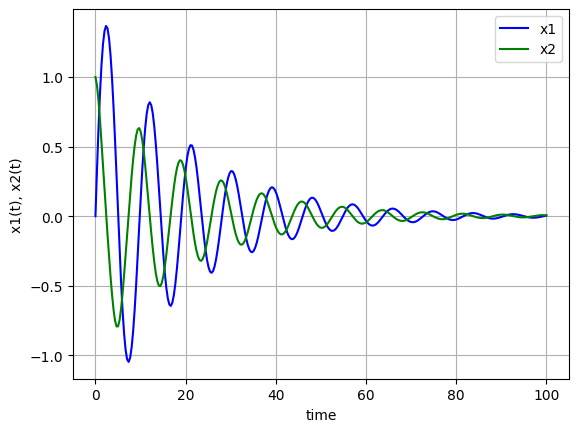

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def rightSideODE(x,t,k1,k2):
    dxdt=[x[1],-k1*x[1]-k2*np.sin(x[0])]
    return dxdt

x0=[0,1]


# define the discretization points
timePoints=np.linspace(0,100,300)

#define the constants 
k1=0.1
k2=0.5
 
solutionOde=odeint(rightSideODE,x0,timePoints, args=(k1,k2))
 
plt.plot(timePoints, solutionOde[:, 0], 'b', label='x1')
plt.plot(timePoints, solutionOde[:, 1], 'g', label='x2')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x1(t), x2(t)')
plt.grid()
plt.show()
    


### Sistema de ecuaciones diferenciales

El sistema de ecuaciones difereenciales puede reescribirse en forma vectorial tal que:

$$ \frac{d\bold{y}}{dt} = \bold{f(y)}  $$

donde $ \bold{y} $ es un vector que contiene las dos variables dependientes A y N, tal que:

$$ 
 \begin{align}
    \bold{y} &= \begin{bmatrix}
           y_{1}\\
           y_{2}\\
         \end{bmatrix}
         &= \begin{bmatrix}
         A(t) \\
         N(t) \\
         \end{bmatrix}
  \end{align}
$$


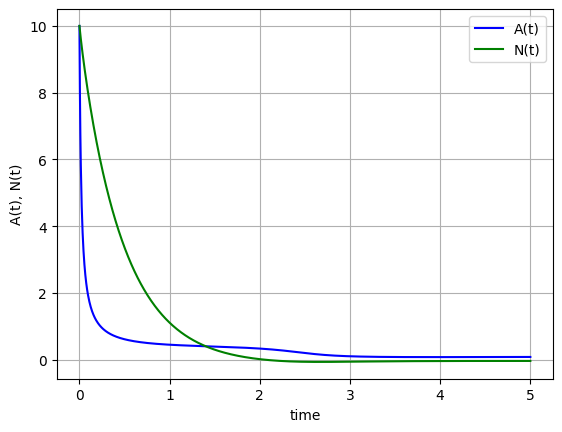

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ra= 0.8
ka= 2
kn= 1
ma= 0.2
mn= 0.1

def EDy(y,  t, ma, mn, ra, ka, kn ):
    dydt= [ ra*y[0]*(1-(y[0]/ka) + (y[1]/(kn+y[1])) ) , #primera ED con izquierda = dA/dt
           - ma*y[0] - mn*y[1]]                           #segunda ED con izquierda = dN/dt
    return dydt                                 #Devuelve el vector con ambas ecuaciones diferenciales

y_0= [10,
      10]

timePoints=np.linspace(0,5,1000) #Dominio de la ED para resolver numericamente

soly = odeint(EDy,y_0,timePoints, args=(ra,ka,kn,ma,mn))

plt.plot(timePoints, soly[:, 0], 'b', label='A(t)')
plt.plot(timePoints, soly[:, 1], 'g', label='N(t)')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('A(t), N(t)')
plt.grid()
plt.show()


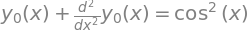

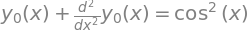

In [61]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import sympy as sp

x = sp.Symbol('x')

yc= sp.Function('y_0')

EDclas= Eq(yc(x).diff(x,x) + yc(x), cos(x)**2)

display(EDclas)

soluEDclas= dsolve(EDclas, yc(x))

display(EDclas)

# solve_ivp

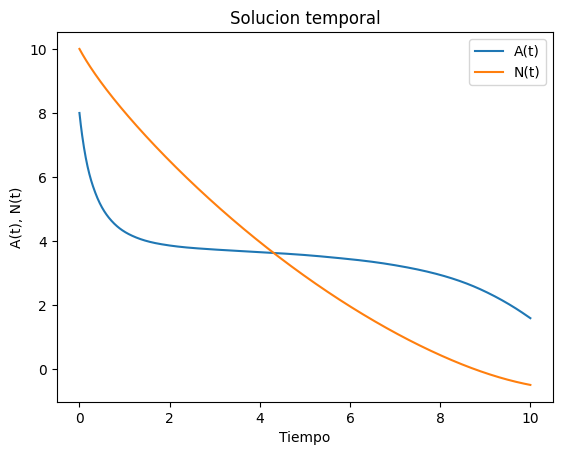

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parametros del modelo
ra= 0.8
ka= 2
kn= 1
ma= 0.2
mn= 0.1

def Svec(t, y):
    dSdt= [ ra*y[0]*(1-(y[0]/ka) + (y[1]/(kn+y[1])) ) , #primera ED con izquierda = dA/dt
           - ma*y[0] - mn*y[1]]                           #segunda ED con izquierda = dN/dt
    return dSdt      

S_0 = [8,10]
t_inter= (0,10)
t= np.linspace(t_inter[0],t_inter[1],1000)

AN_t = solve_ivp(Svec, t_inter, S_0, t_eval=t)
plt.plot(AN_t.t, AN_t.y[0], label='A(t)')
plt.plot(AN_t.t, AN_t.y[1], label='N(t)')
plt.xlabel('Tiempo')
plt.ylabel('A(t), N(t)')
plt.title('Solucion temporal')
plt.legend(loc='best')
plt.show()

## Campo vectorial


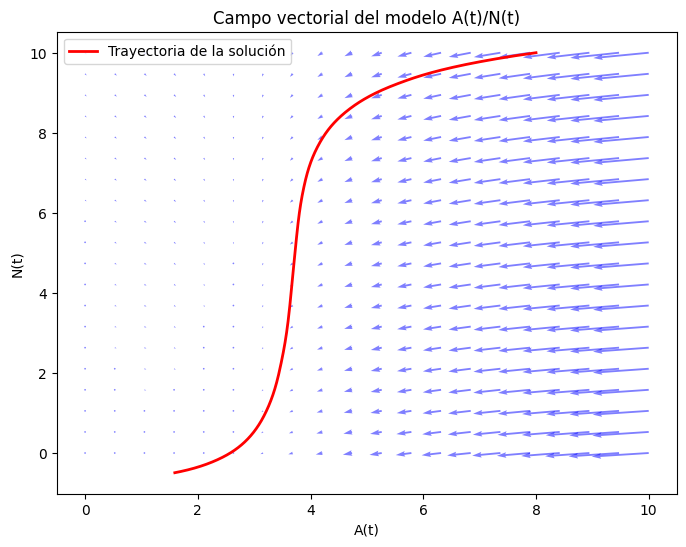

In [10]:
ra= 0.8
ka= 2
kn= 1
ma= 0.2
mn= 0.1
# Crear una cuadrícula de puntos en el plano (y1, y2)
y1, y2 = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))

# Calcular los componentes del campo vectorial
dy1 =  ra*y1*(1-(y1/ka)) + (y2/(kn+y2))
dy2 =  (-ma*y1 - mn*y2)


# Graficar el campo vectorial
plt.figure(figsize=(8, 6))
plt.quiver(y1, y2, dy1, dy2, color='blue', alpha=0.5)
plt.xlabel('A(t)')
plt.ylabel('N(t)')
plt.title('Campo vectorial del modelo A(t)/N(t)')

# Resolver el sistema de ecuaciones para una trayectoria específica
t_span = (0, 10)       # Intervalo de tiempo
t_eval = np.linspace(*t_span, 100)
sol = solve_ivp(Svec, t_span, S_0, t_eval=t_eval)

# Graficar la solución de la solución en el campo vectorial
plt.plot(AN_t.y[0], AN_t.y[1], 'r', label='Trayectoria de la solución', linewidth=2)
plt.legend()
plt.show()